In [1]:
import os
from torch.utils.data import DataLoader
from dataloader_csv import create_dataloader_csv
import matplotlib.pyplot as plt
from PIL import ImageOps
import torchvision
import numpy as np
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import *


device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
# CPUデバイスを指定
# device = torch.device("cpu")

print(device)
path = os.getcwd()
path = '/root/notebooks/sample/dataset/CSV_4label'
train_dataloader,test_dataloader,labels=create_dataloader_csv(path,32,None)
print(train_dataloader)

/python/build/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu
Classification label : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3}
torch.Size([149, 12, 500])
149
test1
dataset len : 149
data 0: (tensor([[  0.,   0.,  -1.,  ..., -20., -21., -22.],
        [  0.,   0.,   0.,  ..., -46., -47., -48.],
        [  0.,   0.,   1.,  ..., -26., -26., -26.],
        ...,
        [  0.,  -2.,  -4.,  ..., -77., -76., -77.],
        [  0.,  -1.,  -2.,  ..., -62., -62., -63.],
        [  0.,   0.,  -2.,  ..., -52., -52., -53.]], dtype=torch.float64), tensor(0))
labels len : 149
tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [2]:
class CNN_12channel(nn.Module):
    def __init__(self, num_classes):
        super(CNN_12channel, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=12, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(kernel_size=3)
        
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=3)
        
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool3 = nn.MaxPool1d(kernel_size=3)

        
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        x = self.fc(x)
        return x
    

class CNN_12channel_(nn.Module):
    def __init__(self, num_classes):
        super(CNN_12channel_, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=12, out_channels=32, kernel_size=10)
        self.pool1 = nn.MaxPool1d(kernel_size=3)
        
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=10)
        self.pool2 = nn.MaxPool1d(kernel_size=3)
        
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=10)
        self.pool3 = nn.MaxPool1d(kernel_size=3)

        self.conv4 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=10)
        self.pool4 = nn.MaxPool1d(kernel_size=3)
        
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
class TimeSeriesCNN(nn.Module):
    def __init__(self, num_classes):
        super(TimeSeriesCNN, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=12, out_channels=16, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        
        # Flattenのための全結合層
        self.fc = nn.Linear(64 * self._calculate_conv_output_size(), num_classes)
    
    def _calculate_conv_output_size(self):
        # 出力サイズの計算を補助する関数
        return (((500 - 2) // 2 - 2) // 2 - 2) // 2
    
    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        
        x = x.view(x.size(0), -1)  # Flatten層
        x = self.fc(x)
        return x


# 0-1スケーリング
def min_max_scale_per_waveform(data):
    # dataの形状を取得
    # batch_size, num_waveforms, time_steps = data.shape
    
    # 各波形の最小値と最大値を計算
    min_vals = data.min(dim=2, keepdim=True)[0]  # (16, 12, 1)
    max_vals = data.max(dim=2, keepdim=True)[0]  # (16, 12, 1)
    
    # スケーリング
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    
    return scaled_data

    

In [3]:
## 診断モデル


num_epochs = 100
learning_rate = 0.0001

# モデルをインスタンス化する
# model = CNN_12channel_(4).to(torch.float64)
model = TimeSeriesCNN(4).to(torch.float64)
# model = CNN_1channel(input_size, hidden_size, num_waveforms, output_size).to(torch.float64)
model = model.to(device)

# 損失関数とオプティマイザを定義する
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

bestscore_csv = 1000.0
loss_list_csv,loss_list_test_csv = [], []
f1s_csv, f1s_test_csv = [],[]
acc_csv, acc_test_csv = [], []


# モデル訓練　5クラス分類

for epoch in range(num_epochs):
    model.train()
    running_loss_csv = 0.0
    preds_csv, label_csv = [], []
    running_loss_csv, running_loss_test_csv = 0.0, 0.0
    preds_test_csv,label_test_csv = [], []

    for inputs, labels in train_dataloader:
        labels = labels.to(device)  # CrossEntropyLossではクラスのインデックスはlong型である必要がある

        optimizer.zero_grad()  # 勾配を初期化

        # inputs = torch.transpose(inputs, 1, 2).to(torch.double).to(device)
        inputs = min_max_scale_per_waveform(inputs)

        outputs = model(inputs).to(torch.float64).to(device)  # モデルの出力を計算

        prob, pred = torch.max(outputs, 1)
        preds_csv.extend(pred.tolist())
        label_csv.extend(labels.tolist())

        loss = criterion(outputs, labels)  # 損失を計算（CrossEntropyLossの引数は予測とラベル）
        loss.backward()  # 勾配を計算
        optimizer.step()  # パラメータを更新

        running_loss_csv += loss.item()

    for inputs,labels in test_dataloader:
        labels = labels.to(device)
        # inputs = torch.transpose(inputs, 1, 2).to(torch.double).to(device)
        outputs = model(inputs).to(device)  # モデルの出力を計算
        outputs = outputs.to(torch.float64)
        prob, pred=torch.max(outputs,1)
        preds_test_csv.extend(pred.tolist())
        label_test_csv.extend(labels.tolist())
        
        #print(outputs)
        loss = criterion(outputs, labels)  # 損失を計算

        running_loss_test_csv += loss.item()
    
    score_csv = running_loss_test_csv/len(test_dataloader)
    
    loss_list_csv.append(running_loss_csv/len(train_dataloader))
    loss_list_test_csv.append(running_loss_test_csv/len(test_dataloader))
    f1_csv = f1_score(preds_csv,label_csv,average='macro')
    f1_test_csv = f1_score(preds_test_csv,label_test_csv,average='macro')
    f1s_csv.append(f1_csv)
    f1s_test_csv.append(f1_test_csv)
    accuracy_csv = accuracy_score(preds_csv,label_csv)
    accuracy_test_csv = accuracy_score(preds_test_csv,label_test_csv)
    acc_csv.append(accuracy_csv)
    acc_test_csv.append(accuracy_test_csv)

    if score_csv < bestscore_csv:
        bestscore_csv = score_csv
        torch.save(model.state_dict(), '/root/notebooks/seq_diagnosis/models_seq/bestmodel_csv_cnn.pth')
        print('best score_csv!!')
        bestf1_dx = f1_test_csv
        bestacc_dx = accuracy_test_csv
        bestf1_np = f1_test_csv
        bestacc_np = accuracy_test_csv

    # 1エポック終了時の損失を表示
    print(f"Epoch [{epoch+1}/{num_epochs}] Train-Loss: {running_loss_csv/len(train_dataloader)} Test-Loss: {running_loss_test_csv/len(train_dataloader)} Train-f1: {f1_csv} Test-f1: {f1_test_csv} Train-acc: {accuracy_csv} Test-acc: {accuracy_test_csv}")
print('bestf1', bestf1_np)
print('bestacc', bestacc_np)

best score_csv!!
Epoch [1/100] Train-Loss: 1.4954483958738467 Test-Loss: 0.34562170164354705 Train-f1: 0.21364536199095024 Test-f1: 0.1846153846153846 Train-acc: 0.23529411764705882 Test-acc: 0.3
best score_csv!!
Epoch [2/100] Train-Loss: 1.137682020776841 Test-Loss: 0.3063671031989369 Train-f1: 0.2821113312916591 Test-f1: 0.2896296296296296 Train-acc: 0.5126050420168067 Test-acc: 0.5
best score_csv!!
Epoch [3/100] Train-Loss: 1.0161340834040309 Test-Loss: 0.28786216503776 Train-f1: 0.35301815111861545 Test-f1: 0.3405797101449275 Train-acc: 0.6470588235294118 Test-acc: 0.6
best score_csv!!
Epoch [4/100] Train-Loss: 0.9269302428928052 Test-Loss: 0.27672570348548825 Train-f1: 0.35775027363812406 Test-f1: 0.34310850439882695 Train-acc: 0.6554621848739496 Test-acc: 0.6
best score_csv!!
Epoch [5/100] Train-Loss: 0.8781825831453869 Test-Loss: 0.2650661622179108 Train-f1: 0.3623853211009175 Test-f1: 0.3405797101449275 Train-acc: 0.6638655462184874 Test-acc: 0.6
best score_csv!!
Epoch [6/100] 

In [4]:
print(model)

TimeSeriesCNN(
  (conv1): Conv1d(12, 16, kernel_size=(3,), stride=(1,))
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3840, out_features=4, bias=True)
)


In [5]:
# モデル評価 ５クラス診断
pred_csv,label_csv = [],[]
model.load_state_dict(torch.load('/root/notebooks/seq_diagnosis/models_seq/bestmodel_csv_cnn.pth'))
model.eval()

for inputs,labels in test_dataloader:
    labels = labels.to(device)
    label_csv.extend(labels.tolist())
    outputs = model(inputs)  # モデルの出力を計算
    prob_csv, preds_csv=torch.max(outputs,1)
    pred_csv.extend(preds_csv.tolist())
    f1_test_csv = f1_score(preds_csv.tolist(),labels.tolist(),average='macro')
    accuracy_test_csv = accuracy_score(preds_test_csv,label_test_csv)
    loss = criterion(outputs, labels)  # 損失を計算

    running_loss_test_csv += loss.item()

print(pred_csv)
print(label_csv)


[2, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 1, 2]
[2, 2, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 0, 3, 2, 1, 3, 1, 3, 2, 1, 2, 3, 1, 2]


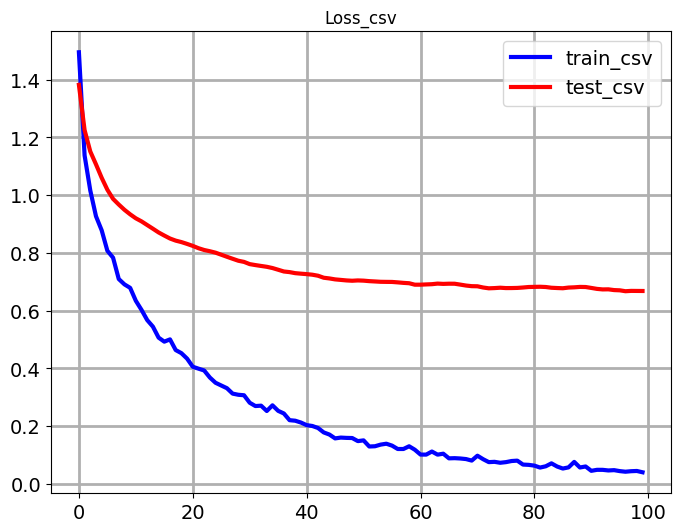

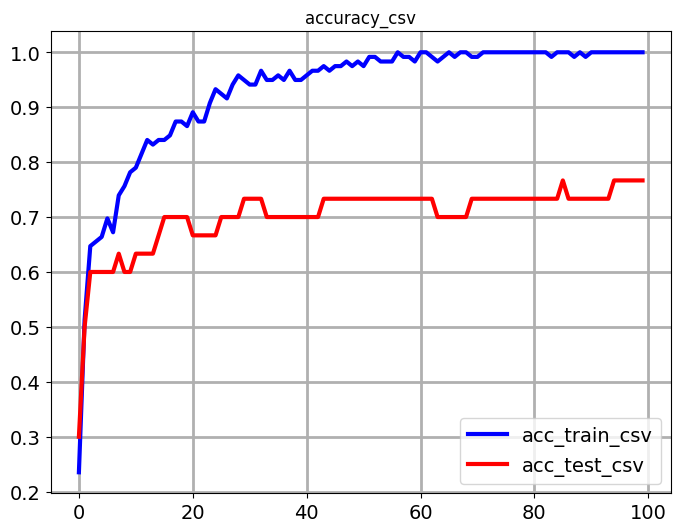

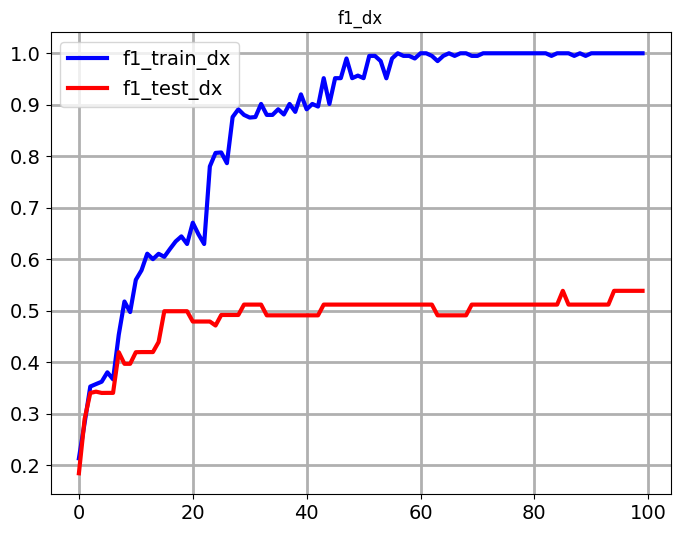

In [6]:
# 学習曲線 (損失関数) 診断モデル
plt.figure(figsize=(8,6))
plt.plot(loss_list_csv,label='train_csv', lw=3, c='b')
plt.plot(loss_list_test_csv,label='test_csv', lw=3, c='r')
plt.title('Loss_csv')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

# 学習曲線 (accuracy)
plt.figure(figsize=(8,6))
plt.plot(acc_csv,label='acc_train_csv', lw=3, c='b')
plt.plot(acc_test_csv,label='acc_test_csv', lw=3, c='r')
plt.title('accuracy_csv')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

# 学習曲線 (f1)
plt.figure(figsize=(8,6))
plt.plot(f1s_csv,label='f1_train_dx', lw=3, c='b')
plt.plot(f1s_test_csv,label='f1_test_dx', lw=3, c='r')
plt.title('f1_dx')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

30
Confusion matrix, without normalization
[[ 0  0  1  0]
 [ 0  4  1  1]
 [ 0  2 10  0]
 [ 0  2  2  7]]


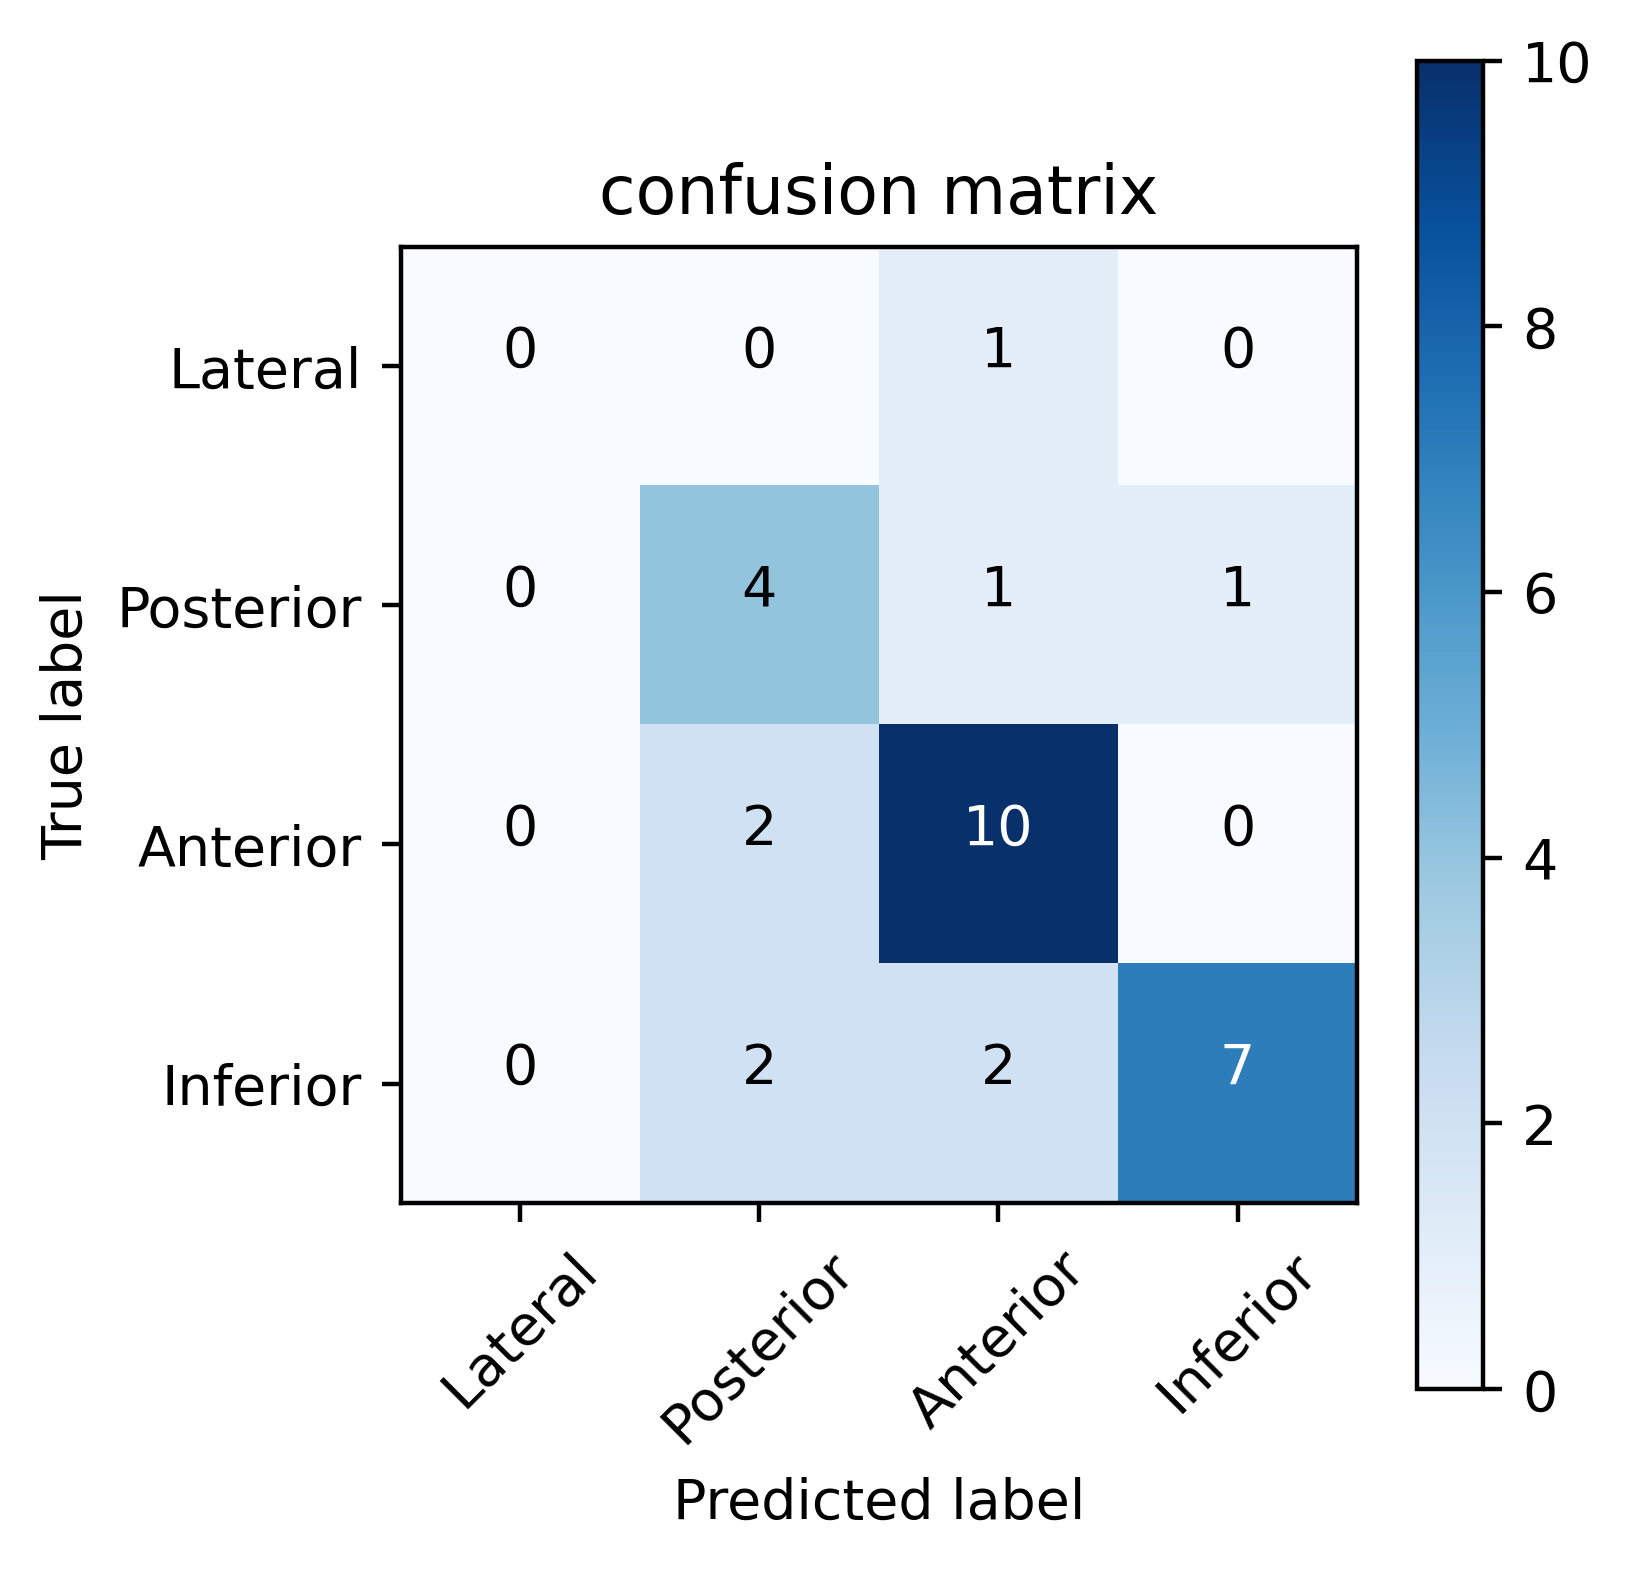

In [7]:
# Confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
           """
           This function prints and plots the confusion matrix.
           Normalization can be applied by setting `normalize=True`.
           """
           if normalize:
               cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
               print("Normalized confusion matrix")
           else:
               print('Confusion matrix, without normalization')
           print(cm)
           plt.imshow(cm, interpolation='nearest', cmap=cmap)
           plt.title(title)
           plt.colorbar()
           tick_marks = np.arange(len(classes))
           plt.xticks(tick_marks, classes, rotation=45)
           plt.yticks(tick_marks, classes)
           fmt = '.2f' if normalize else 'd'
           thresh = cm.max() / 2.
           for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
               plt.text(j, i, format(cm[i, j], fmt),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
           plt.tight_layout()
           plt.ylabel('True label')
           plt.xlabel('Predicted label')
           #plt.savefig(output_file)

print(len(pred_csv))

labels_csv=[0,1,2,3]
label2_csv=['Lateral','Posterior', 'Anterior', 'Inferior']
cnf_matrix=confusion_matrix(label_csv,pred_csv,labels=labels_csv)
title="confusion matrix"
plt.figure(figsize=(4,4),dpi=400)
plot_confusion_matrix(cnf_matrix, classes=label2_csv,title=title)
plt.show()